In [10]:
# import all the needed module

from pandas import DataFrame, read_csv

import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import seaborn as sb
plt.style.use('seaborn-poster')
%matplotlib inline

In [11]:
file = r'datasets/purchase_data.xls'
purchase=pd.read_excel(file)
#purchase.drop('Unnamed: 0',axis=1, inplace=True)

#Assign predictors to a variable of ndarray (matrix) type
array = purchase.values
X = array[:,0:7] # features
y = array[:,-1]

#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print('Number of samples in training set: %d, number of samples in test set: %d'%(len(y_train), len(y_test)))

Number of samples in training set: 791, number of samples in test set: 340


In [37]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40), activation='logistic', max_iter = 4000)

# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 40, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=4000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       267
        1.0       0.97      0.86      0.91        73

avg / total       0.96      0.96      0.96       340



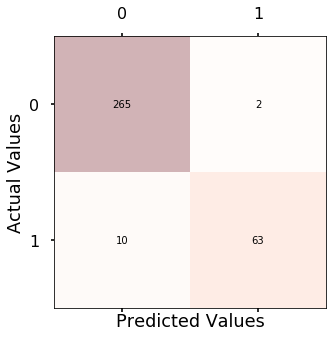

In [35]:
# predict results from the test data
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)
print(classification_report(y_test, predicted))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

It is always a good idea to take a look into correlations between your data.

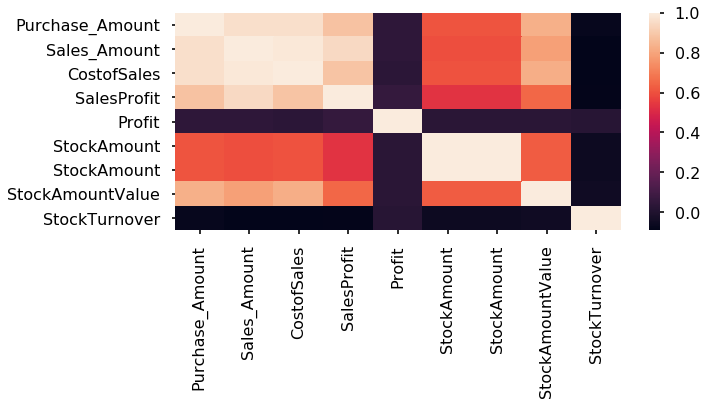

In [9]:
plt.figure(figsize=[10,4])
sb.heatmap(purchase[['Purchase_Amount', 'Sales_Amount', 'CostofSales', 'SalesProfit', 'Profit', 'StockAmount', 'StockAmount','StockAmountValue','StockTurnover' ]].corr())
plt.show()